# Capstone Project - "Zero Waste Company"
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# 1. Introduction: Business problem  # 

***

A Uruguaian brand named "Zero Waste Company" (ZWC) is a small start up that grow as an idea developed between three friends. The core of their business and culture is that they offer a unique experience to their customers, by providing healthy products and without impact in the environment. This will be achivied offering re-usable packages and incentiving customers to do that by providing recyclable trash stations. The start up is planning to install operations in Montevideo, Uruguay, where these three friends are from. To better evaluate the best neighborhood to install the Zer Waste Company Shop, a analysis will be performed.

First, to be sure that you are familiar with Uruguay and its capital, the following maps will help you. Uruguay is in the South of South America, between Argenitna and Brazil.

![alt text](https://i.pinimg.com/236x/fc/8a/9f/fc8a9f8a7b7a9a14af1a9504676a3080--colombia-sur.jpg)![alt text](https://i.pinimg.com/236x/86/0b/38/860b38387ebeed4fb7f3cb0601974606--uruguay-map.jpg) 

Now that you are familiar with the Uruguaian country, we will focus in the objetive of this article. Below are some pre-requisites of the ZWC members to install their operations in Montevideo. To be considerer:

- The ZWC will sell medium to high price products. Therefore, it must be located in a neighborhood of medium to high economic social level and high density area. 
- In the other hand, the shop shall be located near similar shops as healthy restaurants, coffe shops, take and go, etc. This is to be closer and exposed to more customers (or potential customers).
- Also, part of the positive environment impact is to be a station of re-usable and recyclable packagest, compostable garabage. This must be considerer as a part of the location selection.

# 2. Data

***

As stablished in section 1, there are some pre-requisites that we need to consider to determine the best set of locations to provide to ZWC. In this section, the reader will understand how to obtain valuable data conserning all the pre-requisites and how to integrate and analyze it. The Foursquare location data will be used as the principal source of data for this analysis, anyway, other data source or tools could be used.

Ok, now that you are introduced, lets run some code to find the healthy shops in Montevideo. Run the following code to install and import some libraries and then search for all shops that has something to do with the word "healthy" (this is "saludable" in spanish).

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests 

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


#### 2.1 Set Foursquare credentials

In [51]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [5]:
CLIENT_ID = 'QSP4L4U10YG1FLCCH0412GUIIV5XVARIGMLGZO50XM4SGPUF' # your Foursquare ID
CLIENT_SECRET = 'WF5ID5FEGK0AG25K0T0W1YZ4A4NDBVEIO1N1P2UZM2O4TARM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QSP4L4U10YG1FLCCH0412GUIIV5XVARIGMLGZO50XM4SGPUF
CLIENT_SECRET:WF5ID5FEGK0AG25K0T0W1YZ4A4NDBVEIO1N1P2UZM2O4TARM


#### 2.2 Get the query (url) from Foursquare

In [6]:
#Montevideo coordinates
latitude = -34.90307
longitude = -56.13649

query = "saludable"
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, query)

#### 2.3 Get data from Foursquare

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0f352a90ba93138312db92'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 2057,
  'headerLocation': 'Buceo',
  'headerFullLocation': 'Buceo, Montevideo',
  'headerLocationGranularity': 'neighborhood',
  'query': 'saludable',
  'totalResults': 19,
  'suggestedBounds': {'ne': {'lat': -34.8919842383882,
    'lng': -56.13346603423987},
   'sw': {'lat': -34.92573000884743, 'lng': -56.187032056477136}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57d1976b498e4f97b9b71e62',
       'name': 'Club Natural y Popular',
       'location': {'address': 'Blvr. España 2643',
        'crossStreet': 'Luis de la Torre',
        'lat': -34.912986,
        'lng

#### 2.4 Get relevant part of JSON and transform it into a *pandas* dataframe

In [8]:
venues = results['response']['groups'][0]['items']
df = json_normalize(venues)
df.head()

,flags.outsideRadius,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,True,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-57d1976b498e4f97b9b71e62-0,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",57d1976b498e4f97b9b71e62,Blvr. España 2643,UY,Montevideo,Uruguay,Luis de la Torre,2146,"[Blvr. España 2643 (Luis de la Torre), Montevi...","[{'label': 'display', 'lat': -34.912986, 'lng'...",-34.912986,-56.156655,Pocitos,NaN,Montevideo,Club Natural y Popular,0,[],NaN
1,NaN,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-536929cd11d2631a1f615f89-1,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",536929cd11d2631a1f615f89,Luis A. De Herrera 1090,UY,Montevideo,Uruguay,Echaverriarza,560,"[Luis A. De Herrera 1090 (Echaverriarza), 1130...","[{'label': 'display', 'lat': -34.9080792808676...",-34.908079,-56.135901,NaN,11300,Montevideo,Benicio Deli & Coffee House,0,[],85367506
2,True,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5511884b498e1ce66112d072-2,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",5511884b498e1ce66112d072,21 de Setiembre 2752,UY,Montevideo,Uruguay,NaN,2509,"[21 de Setiembre 2752, Montevideo Montevideo, ...","[{'label': 'display', 'lat': -34.9177264953961...",-34.917726,-56.157381,NaN,NaN,Montevideo,Camelia,0,[],124940470
3,True,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dc56bafb0fb5556ccefbda5-3,"[{'id': '4d4b7105d754a06378d81259', 'name': 'S...",4dc56bafb0fb5556ccefbda5,Jaime Zudañez 2511,UY,Montevideo,Uruguay,21 De Setiembre,2471,"[Jaime Zudañez 2511 (21 De Setiembre), Montevi...","[{'label': 'display', 'lat': -34.9163335636146...",-34.916334,-56.158203,NaN,NaN,Montevideo,Mercado Verde,0,[],NaN
4,NaN,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-552fea5c498ee5b604c13d6d-4,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",552fea5c498ee5b604c13d6d,Marco Bruto 1300,UY,Montevideo,Uruguay,Plácido Ellauri,261,"[Marco Bruto 1300 (Plácido Ellauri), 11300 Mon...","[{'label': 'display', 'lat': -34.9040570829520...",-34.904057,-56.139085,NaN,11300,Montevideo,Dorothea,0,[],NaN


df is a dirty data frame of shops related to "healthy". Lets clean the df and see all locations in a map.

In [9]:
df=df[['venue.name','venue.location.lat', 'venue.location.lng', 'venue.location.crossStreet']]
df.rename(columns={'venue.name':'Name','venue.location.lat':'Lat', 'venue.location.lng':'Long', 'venue.location.crossStreet':'Location street'}, inplace=True)
df.head()

,Name,Lat,Long,Location street
0,Club Natural y Popular,-34.912986,-56.156655,Luis de la Torre
1,Benicio Deli & Coffee House,-34.908079,-56.135901,Echaverriarza
2,Camelia,-34.917726,-56.157381,NaN
3,Mercado Verde,-34.916334,-56.158203,21 De Setiembre
4,Dorothea,-34.904057,-56.139085,Plácido Ellauri


In [52]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel


# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df.Lat, df.Long, df.Name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

For demography data, the Uruguaian goverment has some websites to find that information. For easy upload of that information, the following data was obtained from Ministery of Uruguay. The following data frame was defined.

In [11]:
Municipios = ('A', 'B', 'C', 'CH', 'D', 'E', 'F', 'G')
Density = (1441, 12493, 8444, 13177, 2095, 5682, 1987, 1060 )
density = {'Municipio': Municipios, 'Density': Density}
df2=pd.DataFrame(density)
df2

,Municipio,Density
0,A,1441
1,B,12493
2,C,8444
3,CH,13177
4,D,2095
5,E,5682
6,F,1987
7,G,1060


And the map of Montevideo with the Municipios

![alt text](https://upload.wikimedia.org/wikipedia/commons/6/60/Municipios_of_Montevideo.png)

# 3. Methodology

Through this chapter, the reader will understand how the data defined in chapter 2 will be analized and other data generated if it is required. Results of this chapter will be presented and discussed in chapter 4.

First, lets plot the density (people per sq km - hab/km2) by Municipio to explore some estimation for the best place to locate the shop

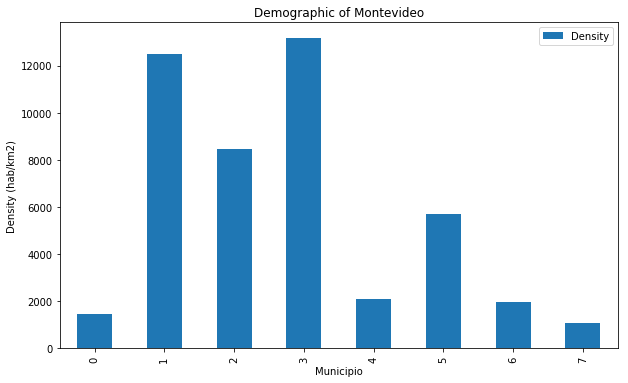

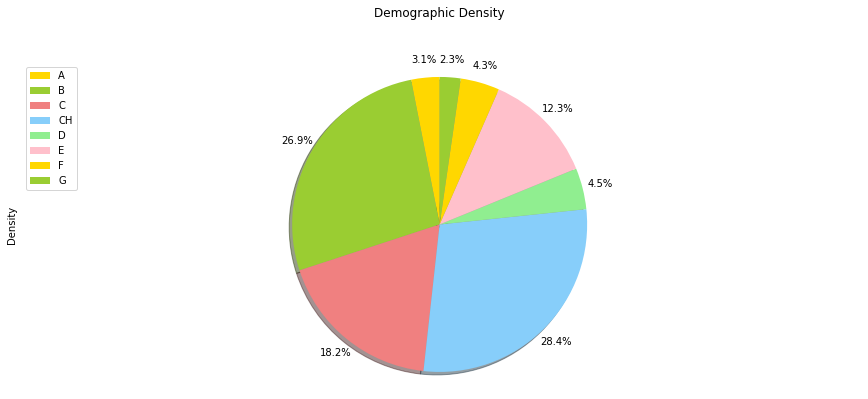

In [12]:
# plot data
df3=df2[['Municipio','Density']]
df3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Municipio') # add to x-label to the plot
plt.ylabel('Density (hab/km2)') # add y-label to the plot
plt.title('Demographic of Montevideo') # add title to the plot

plt.show()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df2['Density'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Demographic Density', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df2.Municipio, loc='upper left') 

plt.show()

Now we have to cross this data with the current healthy shops to better understand the best location for the ZWC shop. For this purpose, we will add some extra data to combine both data frames with Foreing and Primary Keys. This will be a column containing the Municipio of each shop.

In [13]:
df['Municipio'] = ('B', 'CH','C','CH','CH','B','C','B','CH','CH','B','B','CH','E','E','CH','B','B','B')
df

,Name,Lat,Long,Location street,Municipio
0,Club Natural y Popular,-34.912986,-56.156655,Luis de la Torre,B
1,Benicio Deli & Coffee House,-34.908079,-56.135901,Echaverriarza,CH
2,Camelia,-34.917726,-56.157381,NaN,C
3,Mercado Verde,-34.916334,-56.158203,21 De Setiembre,CH
4,Dorothea,-34.904057,-56.139085,Plácido Ellauri,CH
5,Don Lemon,-34.907862,-56.163510,Maldonado,B
6,Adolfo Café,-34.917376,-56.159640,NaN,C
7,Buena Costumbre,-34.910857,-56.175873,San salvador e isla de flores,B
8,La Claraboya,-34.902782,-56.136934,NaN,CH
9,Fans café,-34.905650,-56.182871,Vázquez,CH


So, we could say that the best location (y) is a function of most frequented customer street (s) and the Municipio (m) with higher density.

## location = f(street, municipio)

## y = f(s, m)

As an Analytical Approach, find the most congruent Municipio and frequented streets (in therms of zone):

In [14]:
max_density = df2['Density'].max()
print('The maximum density is', df2['Density'].max(), '- Municipio','CH')

df_sub = df.iloc[[1, 3, 4, 8, 9, 12, 15]]
print('Municipios at CH:', df_sub)

The maximum density is 13177 - Municipio CH
Municipios at CH:                            Name        Lat       Long  Location street  \
1   Benicio Deli & Coffee House -34.908079 -56.135901    Echaverriarza   
3                 Mercado Verde -34.916334 -56.158203  21 De Setiembre   
4                      Dorothea -34.904057 -56.139085  Plácido Ellauri   
8                  La Claraboya -34.902782 -56.136934              NaN   
9                     Fans café -34.905650 -56.182871          Vázquez   
12                       Subway -34.893518 -56.163377  Avelino Miranda   
15                       Sésamo -34.909638 -56.159490              NaN   

   Municipio  
1         CH  
3         CH  
4         CH  
8         CH  
9         CH  
12        CH  
15        CH  


It looks that we found the best Municipio to locate the shop, but, are there any available any shop for rent in this Area and with ZWC members requirments? As we don´t have credentials to access to API for databases of rental locations, let´s make the example with the following data frame:

In [15]:
df8= df[['Municipio','Lat', 'Long']]
df8['price'] = (49990, 60000, 78000, 55500, 82000, 50000, 45000, 20000, 30000, 42000, 78000, 100000, 54000, 63000, 78500, 65000, 55000, 30000, 68000)
df8['sqmeters'] = (40, 60, 80, 55, 72, 160, 133, 120, 56, 95, 65, 87, 59, 63, 78, 87, 82, 54, 65)
df8

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Municipio,Lat,Long,price,sqmeters
0,B,-34.912986,-56.156655,49990,40
1,CH,-34.908079,-56.135901,60000,60
2,C,-34.917726,-56.157381,78000,80
3,CH,-34.916334,-56.158203,55500,55
4,CH,-34.904057,-56.139085,82000,72
5,B,-34.907862,-56.163510,50000,160
6,C,-34.917376,-56.159640,45000,133
7,B,-34.910857,-56.175873,20000,120
8,CH,-34.902782,-56.136934,30000,56
9,CH,-34.905650,-56.182871,42000,95


In [16]:
df5 = df8.drop(df8[df8['Municipio']=='B'].index)
df6 = df5.drop(df5[df5['Municipio']=='C'].index)
df7 = df6.drop(df6[df6['Municipio']=='E'].index)
df7

,Municipio,Lat,Long,price,sqmeters
1,CH,-34.908079,-56.135901,60000,60
3,CH,-34.916334,-56.158203,55500,55
4,CH,-34.904057,-56.139085,82000,72
8,CH,-34.902782,-56.136934,30000,56
9,CH,-34.905650,-56.182871,42000,95
12,CH,-34.893518,-56.163377,54000,59
15,CH,-34.909638,-56.159490,65000,87


As we discussed before, the best combination of parameters are those that maximize sqmeters, minimize price and it should be in the Municipio with higher density. So, we now that the Municipio is CH and the location is a function that depends on price and sq meters:

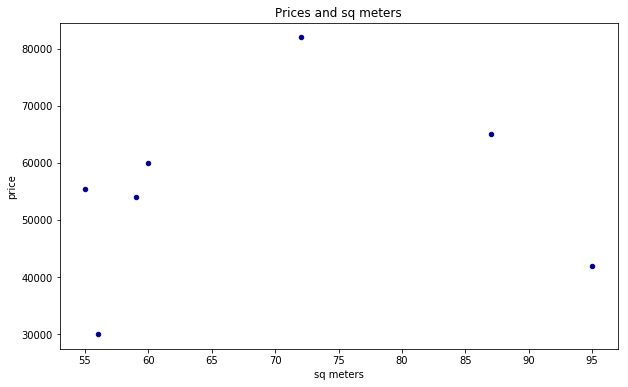

In [17]:
df7.plot(kind='scatter', x='sqmeters', y='price', figsize=(10, 6), color='darkblue')

plt.title('Prices and sq meters')
plt.xlabel('sq meters')
plt.ylabel('price')

plt.show()

(0, 155147.7361782468)

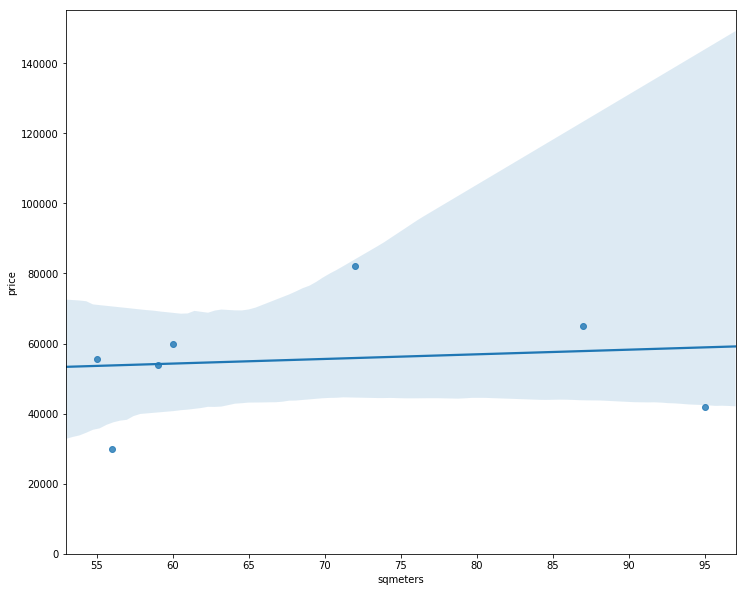

In [23]:
import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="sqmeters", y="price", data=df7)
plt.ylim(0,)

As seen before, the coorelation is postivibe but is not a good correlation. Lets try with polinomial regression:

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for sqmeters ~ price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('price')

    plt.show()
    plt.close()

In [36]:
x = df7['sqmeters']
y = df7['price']
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

       2
-97.4 x + 1.461e+04 x - 4.674e+05


But, how this polynomial model fits to our data?

In [38]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.731328020823206


Since it is not a perfect fit, it is a good value of Rsquare, so we can assume that is a good aproximation for the relation between both variables.

# 4. Results & Discussion

As shown in the previous section, the analysis of the data show that the best palce to locate the shop is in Municipio CH. According to the locations founded in Municipio CH, the best option (considering price and sq meters and ZWC members pre-requisites) are the ones that minimize the funcion y=p(x). In other words, minimize the price but maximizing the area. The exploratory and analysis data suggest that the best option is:

first, the following code shows around what y_hat (predicted price) should be considerer as a part of the ZWC project

In [48]:
print('y_hat (predicted price):', p(x).min())

y_hat (predicted price): 41506.408249764296


If we search for some location near this price, we will find that is:

In [50]:
n=9
df8.iloc[n]

Municipio         CH
Lat         -34.9057
Long        -56.1829
price          42000
sqmeters          95
Name: 9, dtype: object

# 5. Conclusion

Well, we have defined the business problem and some data was defined to explore some solutions for the presented problem. During the route, it was found the relation between dempgraphy density and shops related with heathy products. Also, a relation was found for price and sq meters for available rental shops. Now, the ZWC have the best option to locate its shop and also a methodology to follow in case they need/want to move or expand operations along the city, country or the same method could be applied for other locations. This study is also applicable for other applications related with the location of a shop, even the topic that it is about.